[   10.00179163     6.27721494 -2115.09637299     9.24471102]


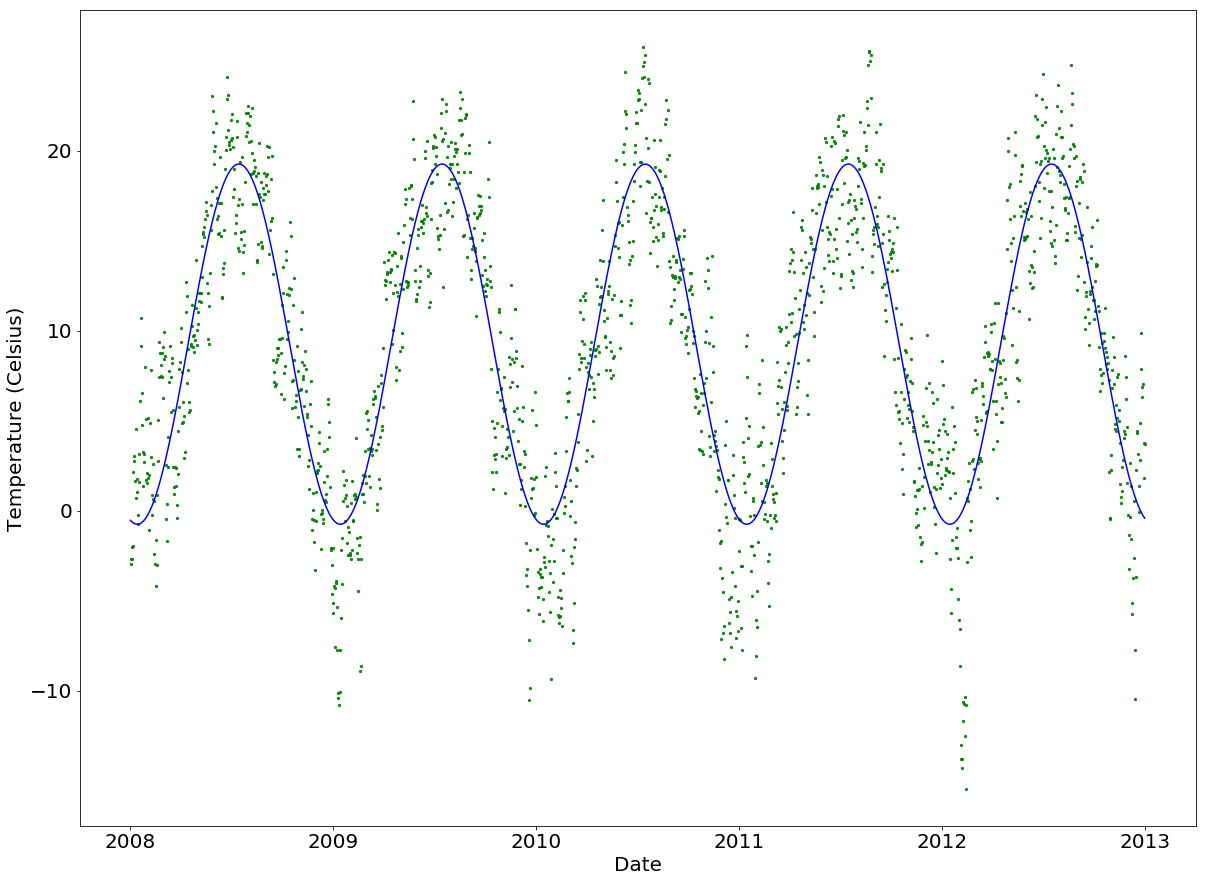

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*(x + c)) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

#Mask Data
gd1 = (Date > 2008) &\
      (Date < 2013) &\
      (Temp < 50) &\
      (Temp > -50)
good1 = np.where(gd1)[0]

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=5,c='g',alpha=0.9)

ax1.set_xlabel("Date",size=20)
ax1.set_ylabel("Temperature (Celsius)",size=20)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

#best fit

#2*3.1415926535/1.25
popt, pcov = opt.curve_fit(cosfit, Date[gd1], Temp[gd1], p0=[20, 2*3.1415926535/1.25, 400, 10])

print(popt)

#plt.scatter(data["Year"], data["Total"])
#plt.xlabel("Year")
#plt.ylabel("CO$_2$ (Mega-tons)")

plt.plot(Date[gd1], cosfit(Date[gd1], *popt), c= 'b')

#Overall Average

#Average during warm- greater than vertical shift(d)

#Average during cold- less than vertical shift(d)


In [2]:
overall_avg_temp = sum(Temp)/len(Temp) #your code here
print(overall_avg_temp)

#cold_Temp is the vertical phase shift minus the amplitude
cold_Temp = 9.24471102 - 10.00179163
print(cold_Temp)

#warm_Temp is the vertical phase shift plus the amplitude
warm_Temp = 9.24471102 + 10.00179163
print(warm_Temp)

8.94190703859861
-0.7570806099999992
19.24650265


a) Best Function: Cosine
b) [10.00179163, 6.27721494, -2115.09637299, 9.24471102] for the cosine function
c)see above
d)The physical parameters indicte the b)period (makes sense), c)phase shift (relatively arbitrary), d)vertical shift (makes sense), and a)amplitude (makes sense)

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

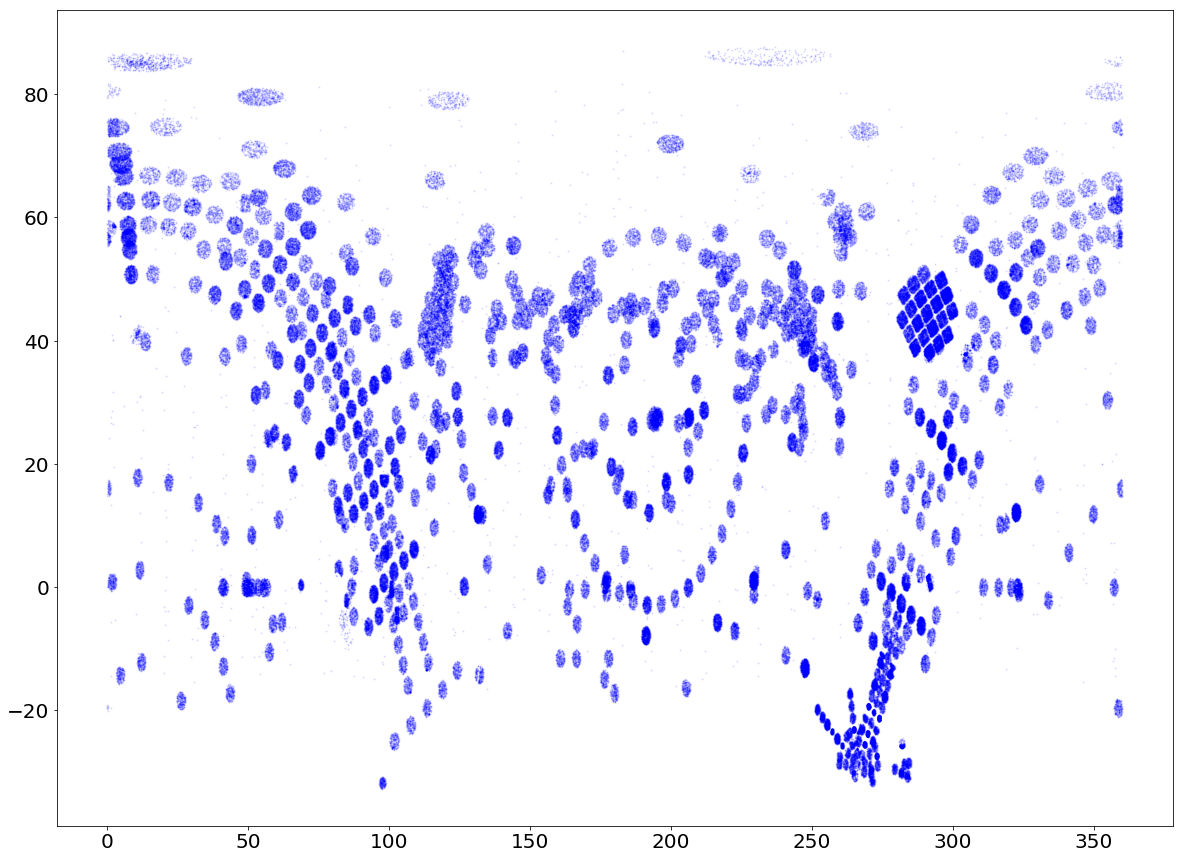

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*(x + c)) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

Disclaimer: As I completed this assignment, I slightly changed my approach for deciding which was the best fit line. For a-c, I first graphed the scatterplot, then chose two or three different graphs that I believed to be visually similar and adjusted the p0 until I returned adequate values. For d-g, I instead used a general p0 value, while also testing every equation available rather than just those that I thought might work. I then 'commented out' over-indexed graphs (usually log and exp), and then eliminated the other graphs which either did not match visually or had larger pcov values. Remaining are the best fit for 2d (linear), 3d, and 4d. I believe both methods have merit, as one is much more active and streamlined, while the other was more thorough and in some cases surprising. 

mean slope: 0.0015 +/- 0.0000 , mean intercept: -4.5423  +/- 0.0102


C:\Users\Veronica\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


vertical stretch: 2.4904 +/- 0.0251  , horizontal change: 0.6315  +/- 0.0253 ,       neg horizontal shift: -1688.6898 +/- 68.0950 , vertical shift: -15.4860  +/- 0.2255


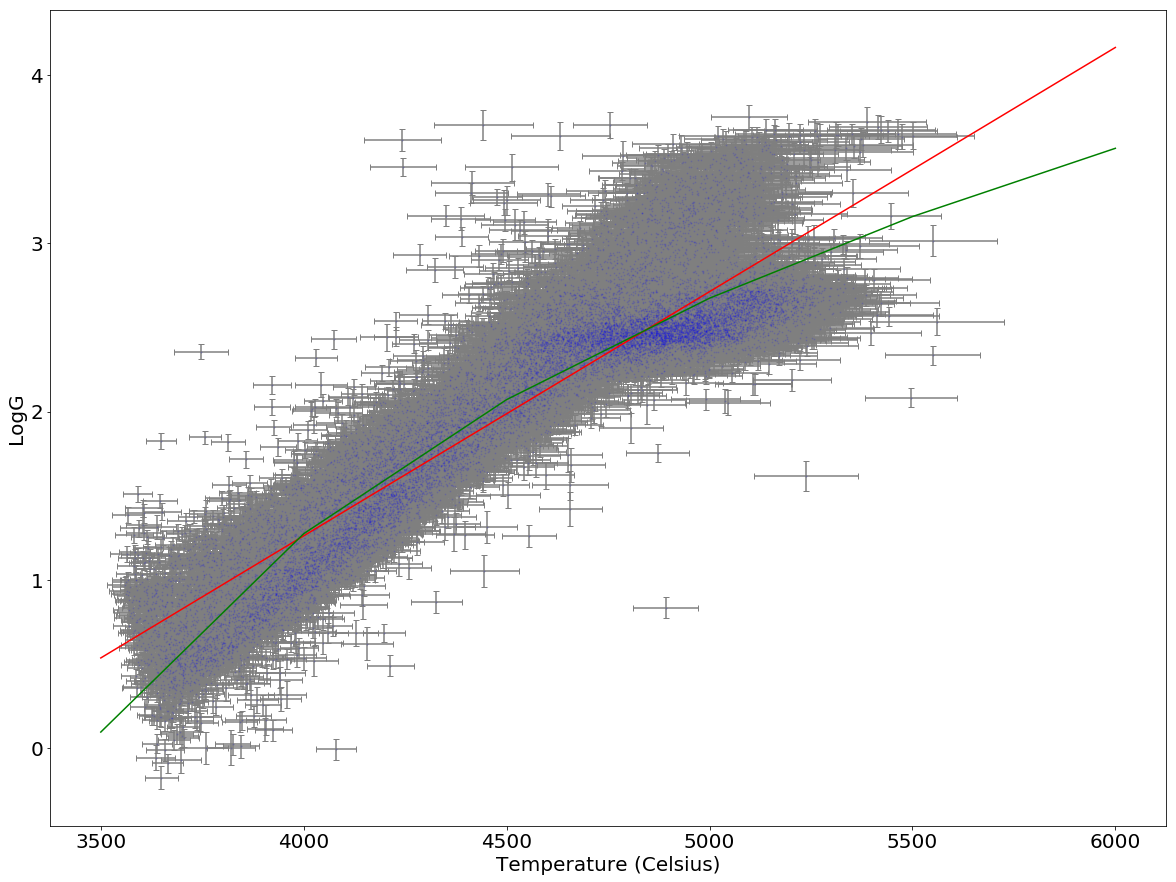

In [4]:
# a)Select stars with only -1 < GLAT < 1

#new programming
gd2 = (star['TEFF'] > 0) &\
     (star['LogG'] > -9999) &\
     (star['GLAT'] > -1) &\
     (star['GLAT'] < 1)
good2 = np.where(gd)[0]


#MC linear fit:
def mcLinearFit(x, y, x_err, y_err, guess):
    a1mean = list()
    b1mean = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)-- following is the simple way to write a gaussian!!
        weights = np.random.randn(len(y))
        weights2 = np.random.randn(len(x))

        y_adj = y + y_err*weights
        x_adj = x + x_err*weights2

        params1, cov = opt.curve_fit(linear, x_adj, y_adj)
        a1mean.append(params1[0])    #slope
        b1mean.append(params1[1])    #intercept
    
    return [np.mean(a1mean), np.mean(b1mean)], [np.std(a1mean), np.std(b1mean)]

#------------------------------------------------------------------------

# 3 PARAMETER MC FIT
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
# To run example
#popt,pcov = mcFit(poly2, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)


#values calculated from the new defined fuction, includes X_ERR
popt1, pcov1 = mcLinearFit(star['TEFF'][gd2], star['LogG'][gd2], star['TEFF_ERR'][gd2], star['LOGG_ERR'][gd2], [.0015, -4.5])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt1[0], pcov1[0], popt1[1], pcov1[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------
    
#MC logfit fit:
def mc4Fit(function, x2, y2, x2_err, y2_err, guess):
    a2mean = list()
    b2mean = list()
    c2mean = list()
    d2mean = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)-- following is the simple way to write a gaussian!!
        weights2y = np.random.randn(len(y2))
        weights2x = np.random.randn(len(x2))

        y2_adj = y2 + y2_err*weights2y
        x2_adj = x2 + x2_err*weights2x

        params2, cov2 = opt.curve_fit(function, x2_adj, y2_adj)
        a2mean.append(params2[0]) 
        b2mean.append(params2[1]) 
        c2mean.append(params2[2])  
        d2mean.append(params2[3]) 
    
    return [np.mean(a2mean), np.mean(b2mean),  np.mean(c2mean), np.mean(d2mean)], \
    [np.std(a2mean), np.std(b2mean), np.std(c2mean), np.std(d2mean)]

#values calculated from the new defined fuction, includes X_ERR
popt2, pcov2 = mc4Fit(logfit, star['TEFF'][gd2], star['LogG'][gd2], star['TEFF_ERR'][gd2], star['LOGG_ERR'][gd2], \
                   [2.4, 0.6, -1680, -15])

print('vertical stretch: {:6.4f} +/- {:6.4f}  , horizontal change: {:6.4f}  +/- {:6.4f} , \
      neg horizontal shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
      .format(popt2[0], pcov2[0], popt2[1], pcov2[1], popt2[2], pcov2[2], popt2[3], pcov2[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#new programming

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][gd2],star['LogG'][gd2],s=1,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][gd2], star['LogG'][gd2],yerr=star['LOGG_ERR'][gd2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][gd2], star['LogG'][gd2],xerr=star['TEFF_ERR'][gd2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

xplot = np.arange(3500,6001,500)
ax.plot(xplot, linear(xplot, popt1[0], popt1[1]), c='r')
ax.plot(xplot, logfit(xplot, popt2[0], popt2[1], popt2[2], popt2[3]), c='g')

ax.set_xlabel("Temperature (Celsius)",size=20)
ax.set_ylabel("LogG",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#plt.legend(loc='best', fontsize=18)
plt.show()


#try it with some other function

a) see above
b) The two functions which best fit the data, that I was able to be successful with, are the linear (based on 2 variables) and logarithmic (based on 3 variables). I chose these two graphs by visual similarity to what these usually appear as. 
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous, and there are too few outliers for a legitimate population.

mean slope: -0.1597 +/- 0.0006 , mean intercept: 0.0477  +/- 0.0001
minor stretch: 0.1486 +/- 0.0020  , major stretch: 2.0408  +/- 0.0243 ,       horizontal shift: 2.7098 +/- 0.0030 , vertical shift: 0.1675  +/- 0.0020


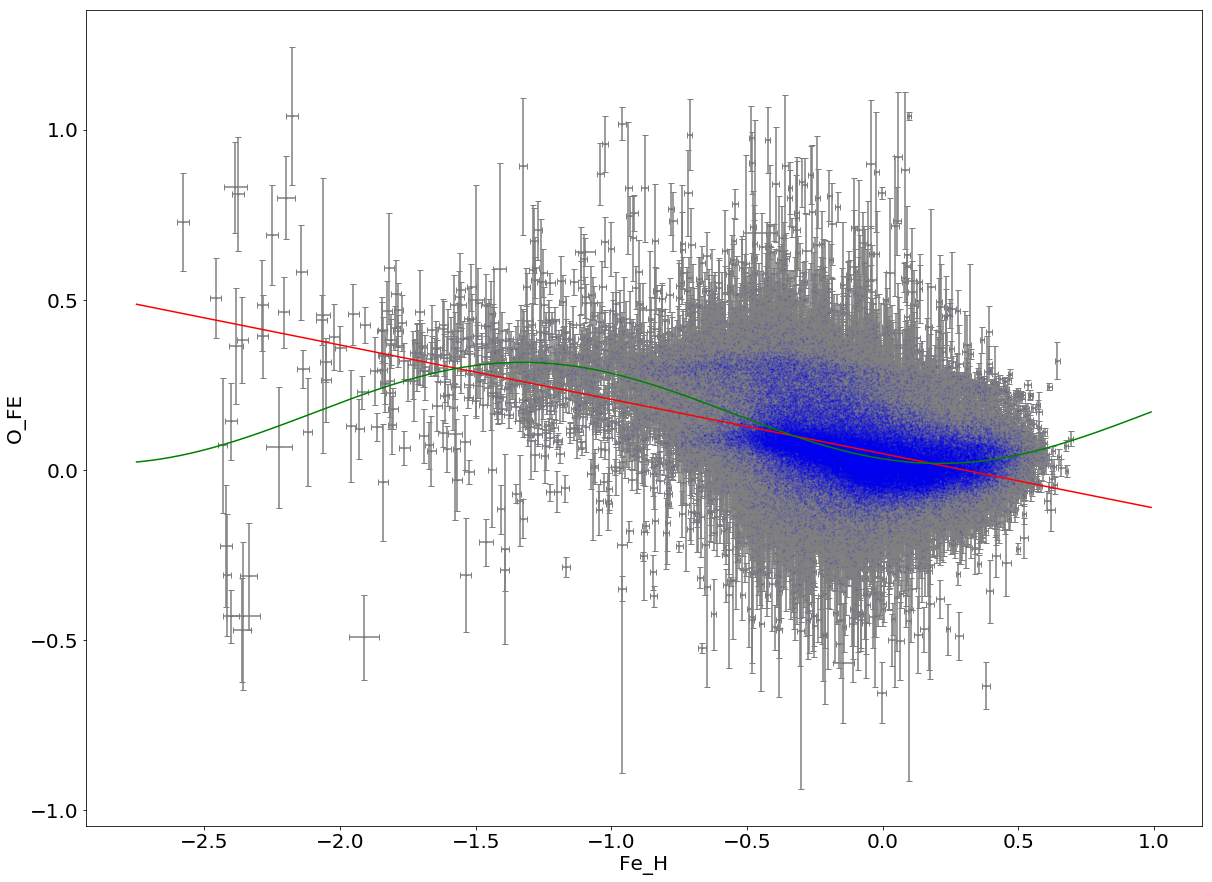

In [5]:
# b)Select stars with only -10 < GLAT < 10


gd3 = (star['Fe_H'] > -9999) &\
     (star['O_FE'] > -9999) &\
     (star['GLAT'] > -10) &\
     (star['GLAT'] < 10)
good3 = np.where(gd)[0]

#values calculated from the new defined fuction, includes X_ERR
popt3, pcov3 = mcLinearFit(star['Fe_H'][gd3], star['O_FE'][gd3], star['Fe_H_ERR'][gd3], star['O_FE_ERR'][gd3], [-0.1, 0])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt3[0], pcov3[0], popt3[1], pcov3[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------


#values calculated from the new defined fuction, includes X_ERR
popt4, pcov4 = mc4Fit(cosfit, star['Fe_H'][gd3], star['O_FE'][gd3], star['Fe_H_ERR'][gd3], star['O_FE_ERR'][gd3], \
                   [.14, 2, 2.7, .17])

print('minor stretch: {:6.4f} +/- {:6.4f}  , major stretch: {:6.4f}  +/- {:6.4f} , \
      horizontal shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
      .format(popt4[0], pcov4[0], popt4[1], pcov4[1], popt4[2], pcov4[2], popt4[3], pcov4[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

fig = plt.figure(figsize=(20,15))
ax3 = fig.add_subplot(111)
ax3.scatter(star['Fe_H'][gd3],star['O_FE'][gd3],s=1,c='b',alpha=0.1)
ax3.errorbar(star['Fe_H'][gd3], star['O_FE'][gd3],yerr=star['O_FE_ERR'][gd3], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax3.errorbar(star['Fe_H'][gd3], star['O_FE'][gd3],xerr=star['Fe_H_ERR'][gd3], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)


xplot3 = np.arange(-2.75,1,0.01)
ax3.plot(xplot3, linear(xplot3, popt3[0], popt3[1]), c='r')
ax3.plot(xplot3, cosfit(xplot3, popt4[0], popt4[1], popt4[2], popt4[3]), c='g')


ax3.set_xlabel("Fe_H",size=20)
ax3.set_ylabel("O_FE",size=20)

ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
plt.show()

a) see above
b) The two functions which best fit the data, that I was able to be successful with, are the linear (based on 2 variables) and cosine (based on 3 variables). I chose these two graphs by visual similarity to what these usually appear as. 
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous, and there are too few outliers for a legitimate population.

mean slope: -0.1287 +/- 0.0011 , mean intercept: 0.0472  +/- 0.0002
minor stretch: 0.0982 +/- 0.0726  , major stretch: 2.1863  +/- 0.1937 ,       horizontal shift: 2.4168 +/- 0.9111 , vertical shift: 0.1426  +/- 0.0033
top vertical stretch: 0.1282 +/- 0.0059  , bottom vertical stretch: 0.2335  +/- 0.0045 ,       southwest shift: -0.1168 +/- 0.0012 , vertical shift: 0.0330  +/- 0.0004


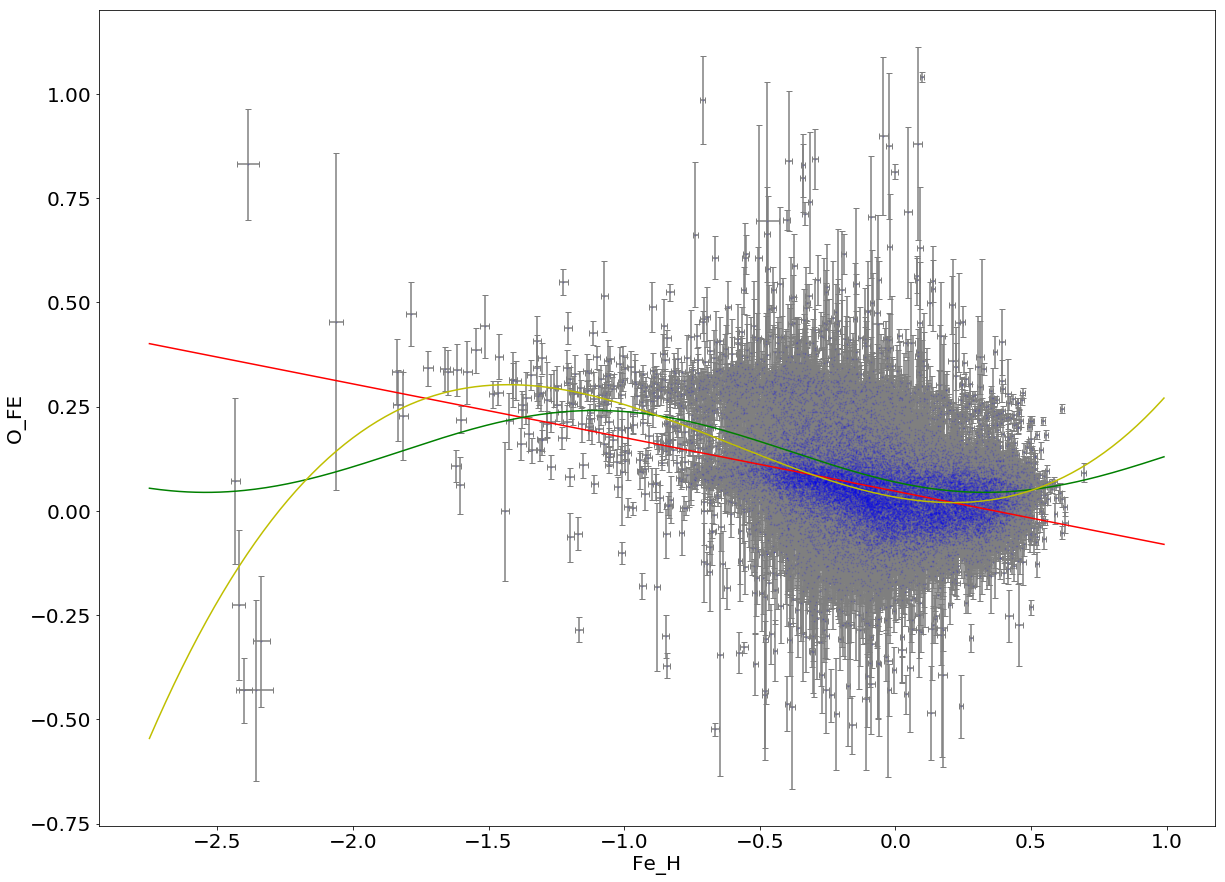

In [6]:
# c)Select stars with only -2 < GLAT < 2


gd4 = (star['Fe_H'] > -9999) &\
     (star['O_FE'] > -9999) &\
     (star['GLAT'] > -2) &\
     (star['GLAT'] < 2)
good4 = np.where(gd)[0]

#values calculated from the new defined fuction, includes X_ERR
popt5, pcov5 = mcLinearFit(star['Fe_H'][gd4], star['O_FE'][gd4], star['Fe_H_ERR'][gd4], star['O_FE_ERR'][gd4], [-0.1, 0.04])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt5[0], pcov5[0], popt5[1], pcov5[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------


#values calculated from the new defined fuction, includes X_ERR
popt6, pcov6 = mc4Fit(cosfit, star['Fe_H'][gd4], star['O_FE'][gd4], star['Fe_H_ERR'][gd4], star['O_FE_ERR'][gd4], \
                   [.1, 2.2, 2.4, .14])

print('minor stretch: {:6.4f} +/- {:6.4f}  , major stretch: {:6.4f}  +/- {:6.4f} , \
      horizontal shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
      .format(popt6[0], pcov6[0], popt6[1], pcov6[1], popt6[2], pcov6[2], popt6[3], pcov6[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction, includes X_ERR
popt7, pcov7 = mc4Fit(poly3, star['Fe_H'][gd4], star['O_FE'][gd4], star['Fe_H_ERR'][gd4], star['O_FE_ERR'][gd4], \
                   [.12, .23, -.1, .03])

print('top vertical stretch: {:6.4f} +/- {:6.4f}  , bottom vertical stretch: {:6.4f}  +/- {:6.4f} , \
      southwest shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
      .format(popt7[0], pcov7[0], popt7[1], pcov7[1], popt7[2], pcov7[2], popt7[3], pcov7[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['Fe_H'][gd4],star['O_FE'][gd4],s=1,c='b',alpha=0.1)
ax4.errorbar(star['Fe_H'][gd4], star['O_FE'][gd4],yerr=star['O_FE_ERR'][gd4], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['Fe_H'][gd4], star['O_FE'][gd4],xerr=star['Fe_H_ERR'][gd4], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)


xplot4 = np.arange(-2.75,1,0.01)
ax4.plot(xplot4, linear(xplot4, popt5[0], popt5[1]), c='r')
ax4.plot(xplot4, cosfit(xplot4, popt6[0], popt6[1], popt6[2], popt6[3]), c='g')
ax4.plot(xplot4, poly3(xplot4, popt7[0], popt7[1], popt7[2], popt7[3]), c='y')

ax4.set_xlabel("Fe_H",size=20)
ax4.set_ylabel("O_FE",size=20)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

a) see above
b) The two functions which best fit the data, that I was able to be successful with, are the linear (based on 2 variables) and poly 3 (based on 3 variables). Both cosine and poly3 were visually appropriate and similar in their pcov values, but ultimately the poly3 was slightly more accurate.
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous, and there are too few outliers for a legitimate population.

mean slope: -0.0006 +/- 0.0000 , mean intercept: 3.7662  +/- 0.0042
a: 919.4220 +/- 5.8383 , b: 185.5732  +/- 20.0751, c: 431.4738  +/- 75.1082
a: -0.0002 +/- 0.0043  , b: 1.0001  +/- 0.0010 ,       c: 0.8104 +/- 4.7906 , d: 1.1223  +/- 0.0002


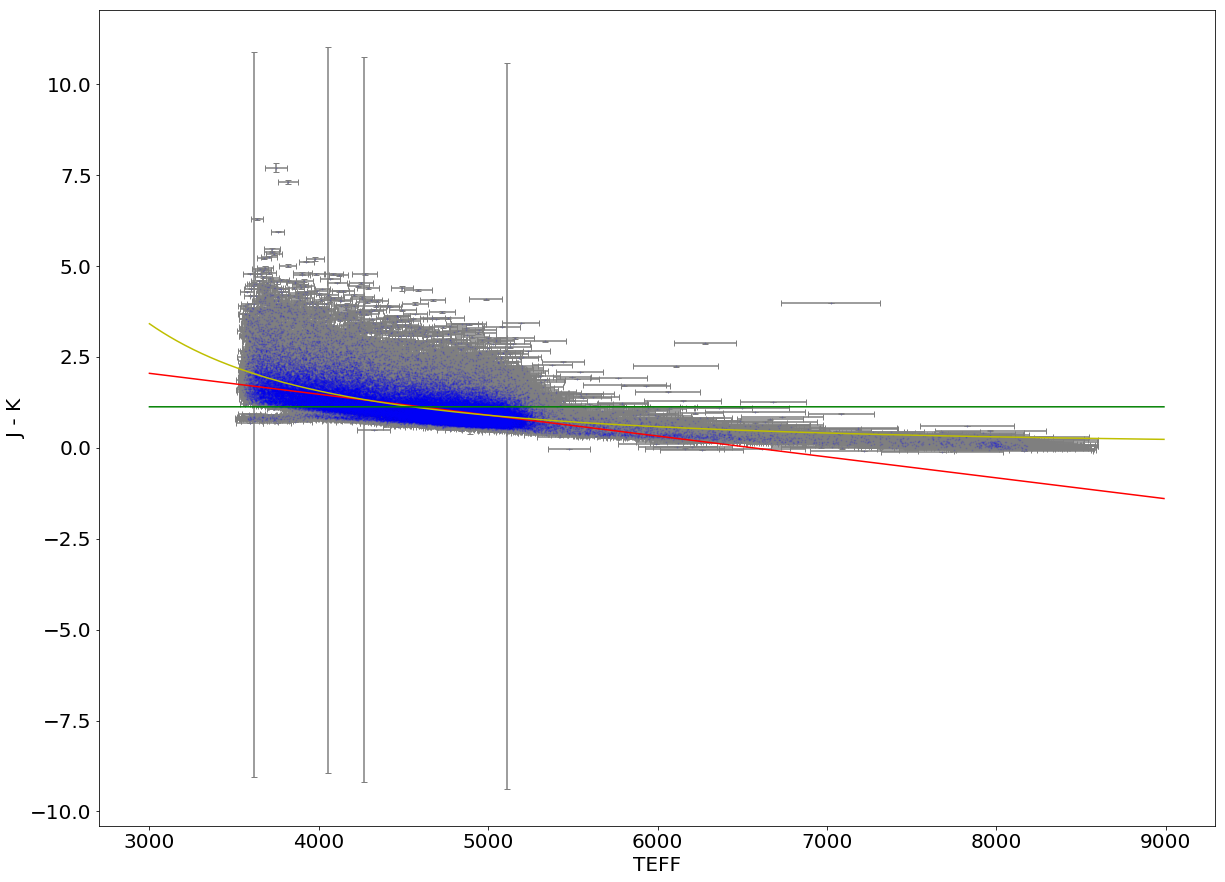

In [8]:
#d) GLAT 10, TEFF and J-K


gd5 = (star['TEFF'] > -9999) &\
     (star['J'] > -9999) &\
     (star['K'] > -9999) &\
     (star['J_ERR'] > -9999) &\
     (star['K_ERR'] > -9999) &\
     (star['GLAT'] > -10) &\
     (star['GLAT'] < 10)
good5 = np.where(gd)[0]

ddata = star['J'][gd5] - star['K'][gd5]
derr = star['J_ERR'][gd5] - star['K_ERR'][gd5]


#values calculated from the new defined fuction, includes error
popt8, pcov8 = mcLinearFit(star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, [0, 3.8])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt8[0], pcov8[0], popt8[1], pcov8[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
#popt9, pcov9 = mcFit3param(poly2, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, [0, 0, 6.7])

#print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt9[0], pcov9[0], popt9[1], pcov9[1], \
#                                                                                      popt9[2], pcov9[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
popt10, pcov10 = mcFit3param(lorentzian_cauchy, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, [920, 170, 520])

print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt10[0], pcov10[0], popt10[1], \
                                                                                      pcov10[1], popt10[2], pcov10[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt11, pcov11 = mc4Fit(poly3, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, \
#                   [0, 0, 0, 13])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt15[0], pcov15[0], popt15[1], pcov15[1], popt15[2], pcov15[2], popt15[3], pcov15[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt12, pcov12 = mc4Fit(exponential, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, \
#                   [-.75, 2, -7490, 3.5])

#print('vertical stretch: {:6.4f} +/- {:6.4f}  , horizontal change: {:6.4f}  +/- {:6.4f} , \
#      neg horizontal shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
#      .format(popt12[0], pcov12[0], popt12[1], pcov12[1], popt12[2], pcov12[2], popt12[3], pcov12[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
popt13, pcov13 = mc4Fit(cosfit, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, \
                   [0, 1, 1, 1])

print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
      .format(popt13[0], pcov13[0], popt13[1], pcov13[1], popt13[2], pcov13[2], popt13[3], pcov13[3]))
        #6.4f is 6 numbers with 4 decimals 

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt14, pcov14 = mc4Fit(logfit, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, \
#                   [-.75, 2, -7490, 3.5])

#print('vertical stretch: {:6.4f} +/- {:6.4f}  , horizontal change: {:6.4f}  +/- {:6.4f} , \
#      neg horizontal shift: {:6.4f} +/- {:6.4f} , vertical shift: {:6.4f}  +/- {:6.4f}' \
#      .format(popt14[0], pcov14[0], popt14[1], pcov14[1], popt14[2], pcov14[2], popt14[3], pcov14[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt15, pcov15 = mc4Fit(sigmoid, star['TEFF'][gd5], ddata, star['TEFF_ERR'][gd5], derr, \
#                   [1, 1, 100, -100])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt15[0], pcov15[0], popt15[1], pcov15[1], popt15[2], pcov15[2], popt15[3], pcov15[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['TEFF'][gd5],ddata,s=1,c='b',alpha=0.1)
ax4.errorbar(star['TEFF'][gd5], ddata,yerr = derr, \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['TEFF'][gd5], ddata,xerr=star['TEFF_ERR'][gd5], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)


xplot5 = np.arange(3000, 9000,10)
ax4.plot(xplot5, linear(xplot5, popt8[0], popt8[1]), c='r')
#ax4.plot(xplot5, gausian(xplot5, popt8[0], popt8[1]), c='y')

#ax4.plot(xplot5, poly2(xplot5, popt9[0], popt9[1], popt9[2]), c='y')
ax4.plot(xplot5, lorentzian_cauchy(xplot5, popt10[0], popt10[1], popt10[2]), c='y')

#ax4.plot(xplot5, poly3(xplot5, popt11[0], popt11[1], popt11[2], popt11[3]), c='g')
#ax4.plot(xplot5, exponential(xplot5, popt12[0], popt12[1], popt12[2], popt12[3]), c='y')
ax4.plot(xplot5, cosfit(xplot5, popt13[0], popt13[1], popt13[2], popt13[3]), c='g')
#ax4.plot(xplot5, logfit(xplot5, popt14[0], popt14[1], popt14[2], popt14[3]), c='y')
#ax4.plot(xplot5, sigmoid(xplot5, popt15[0], popt15[1], popt15[2], popt15[3]), c='y')

ax4.set_xlabel("TEFF",size=20)
ax4.set_ylabel("J - K",size=20)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

warning: lorentzian cauchy often has to be run twice to work
a) see above
b) The three functions which best fit the data, that I was able to be successful with, are the linear, lorentzian cauchy, and cosine graphs. Lorentzian cauchy is visually the best fit (though not necessarily the best fit by pcov), as the data points closely resemble the right end of a distribution curve.
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous, and there are too few outliers for a legitimate population.

mean slope: 0.0327 +/- 0.0000 , mean intercept: -8.3475  +/- 0.0025
a: 0.0010 +/- 0.0000 , b: -0.2442  +/- 0.0000, c: 3.4096  +/- 0.0033
a: -0.0000 +/- 0.0000  , b: 0.0173  +/- 0.0000 ,       c: -2.2845 +/- 0.0001 , d: 46.4506  +/- 0.0046


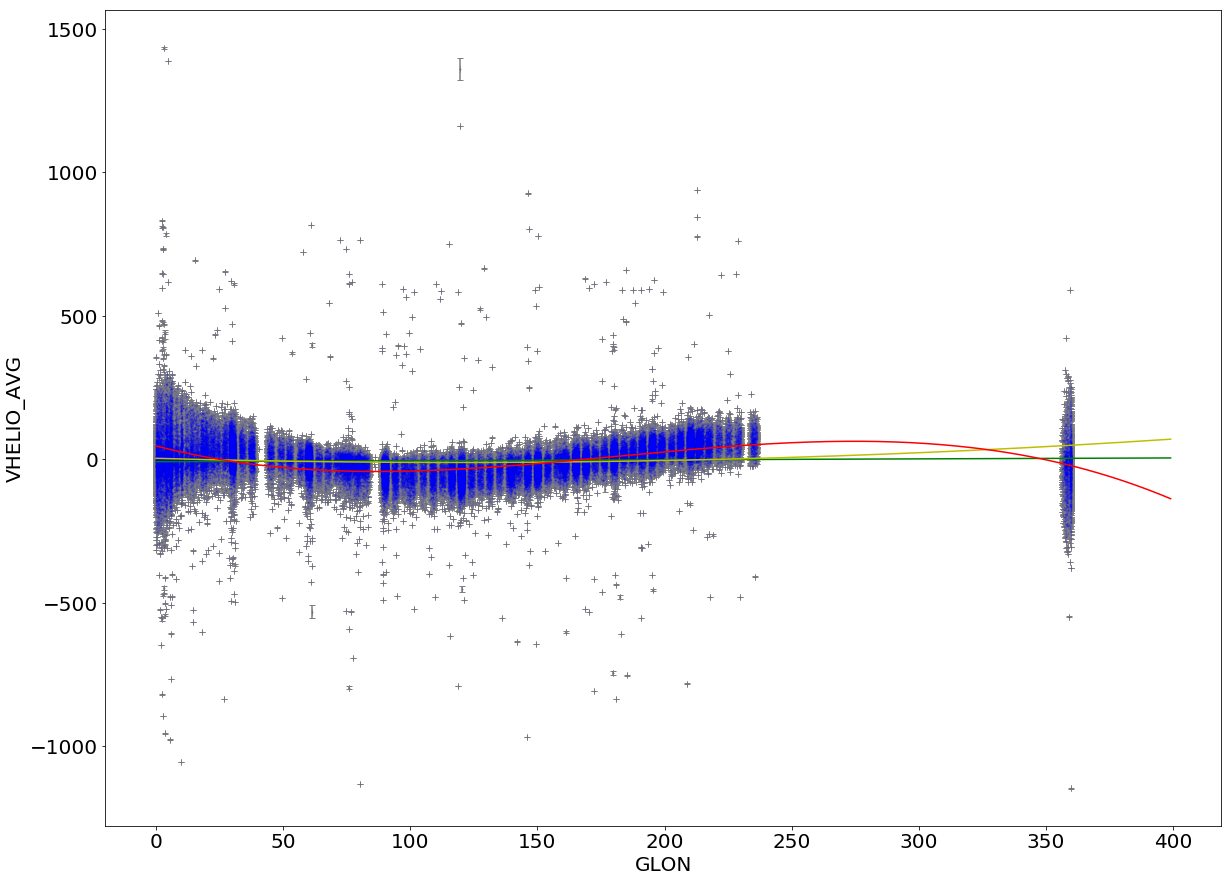

In [9]:
#e) GLAT 10, GLON vs. VHELIO_AVG

gd6 = (star['GLON'] > -9999) &\
     (star['VHELIO_AVG'] > -9999) &\
     (star['VERR'] < 9999) &\
     (star['GLAT'] > -10) &\
     (star['GLAT'] < 10)
good6 = np.where(gd)[0]

#defining X-error
X_ERR = []
for i in range(len(star['GLON'][gd6])):
    X_ERR.append(0)
#print(X_ERR)


#values calculated from the new defined fuction, includes error
popt16, pcov16 = mcLinearFit(star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], [0, -8])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt16[0], pcov16[0], popt16[1], pcov16[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
popt17, pcov17 = mcFit3param(poly2, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], [0, -0.2, 3])

print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt17[0], pcov17[0], popt17[1], \
                                                                                      pcov17[1], popt17[2], pcov17[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
#popt18, pcov18 = mcFit3param(lorentzian_cauchy, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
#                             [-0.1, 0, 0])

#print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt18[0], pcov18[0], popt18[1], \
#                                                                                      pcov18[1], popt18[2], pcov18[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction
popt19, pcov19 = mc4Fit(poly3, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
                   [0, 0.02, -2.3, 46])

print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
      .format(popt19[0], pcov19[0], popt19[1], pcov19[1], popt19[2], pcov19[2], popt19[3], pcov19[3]))
        #6.4f is 6 numbers with 4 decimals 
    
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt20, pcov20 = mc4Fit(exponential, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt20[0], pcov20[0], popt20[1], pcov20[1], popt20[2], pcov20[2], popt20[3], pcov20[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt21, pcov21 = mc4Fit(cosfit, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
#                   [6, 1, 4, -4.5])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt21[0], pcov21[0], popt21[1], pcov21[1], popt21[2], pcov21[2], popt21[3], pcov21[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt22, pcov22 = mc4Fit(logfit, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt22[0], pcov22[0], popt22[1], pcov22[1], popt22[2], pcov22[2], popt22[3], pcov22[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt23, pcov23 = mc4Fit(sigmoid, star['GLON'][gd6], star['VHELIO_AVG'][gd6], X_ERR, star['VERR'][gd6], \
#                  [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt23[0], pcov23[0], popt23[1], pcov23[1], popt23[2], pcov23[2], popt23[3], pcov23[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------



fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['GLON'][gd6],star['VHELIO_AVG'][gd6],s=1,c='b',alpha=0.1)
ax4.errorbar(star['GLON'][gd6], star['VHELIO_AVG'][gd6],yerr=star['VERR'][gd6], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['GLON'][gd6], star['VHELIO_AVG'][gd6],xerr=X_ERR, \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)

xplot6 = np.arange(0, 400, 1)
ax4.plot(xplot6, linear(xplot6, popt16[0], popt16[1]), c='g')
#ax4.plot(xplot6, gausian(xplot6, popt8[0], popt8[1]), c='y')

ax4.plot(xplot6, poly2(xplot6, popt17[0], popt17[1], popt17[2]), c='y')
#ax4.plot(xplot6, lorentzian_cauchy(xplot6, popt18[0], popt18[1], popt18[2]), c='r')

ax4.plot(xplot6, poly3(xplot6, popt19[0], popt19[1], popt19[2], popt19[3]), c='r')
#ax4.plot(xplot6, exponential(xplot6, popt20[0], popt20[1], popt20[2], popt20[3]), c='y')
#ax4.plot(xplot6, cosfit(xplot6, popt21[0], popt21[1], popt21[2], popt21[3]), c='b')
#ax4.plot(xplot6, logfit(xplot6, popt22[0], popt22[1], popt22[2], popt22[3]), c='y')
#ax4.plot(xplot6, sigmoid(xplot6, popt23[0], popt23[1], popt23[2], popt23[3]), c='y')

ax4.set_xlabel("GLON",size=20)
ax4.set_ylabel("VHELIO_AVG",size=20)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

a) see above
b) The three functions which best fit the data, that I was able to be successful with, are the linear, poly2, and poly 3 graphs. The cosine graph had potential, but was ultimately less accurate than the poly3 graph. Lorentzian cauchy, though successful, had a very strange appearance and based on the original equations, should have just appeared as y=0. Due to this irregularity it was elimininated. 
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous.

mean slope: 0.2711 +/- 0.0003 , mean intercept: 0.0229  +/- 0.0028
a: -0.0079 +/- 0.0000 , b: 0.4480  +/- 0.0009, c: -0.4206  +/- 0.0044
a: -0.0007 +/- 0.0000  , b: 0.0190  +/- 0.0001 ,       c: 0.2040 +/- 0.0017 , d: 0.0241  +/- 0.0057


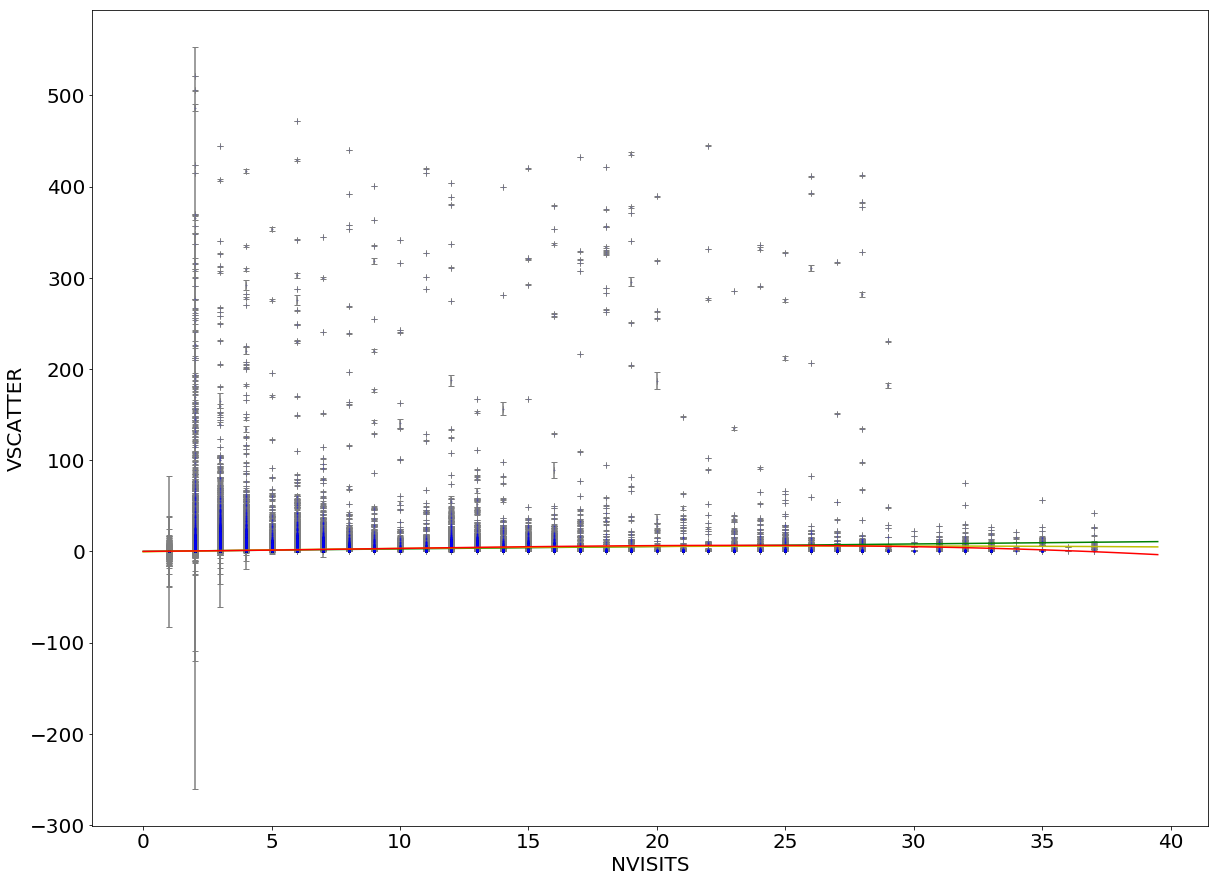

In [10]:
#f) no GLAT, NVISITS vs VSCATTER

gd7 = (star['NVISITS'] > -9999) &\
     (star['VSCATTER'] > -9999) &\
     (star['VERR'] < 9999)
good7 = np.where(gd)[0]

#defining X-error
X_ERR1 = []
for i in range(len(star['NVISITS'][gd7])):
    X_ERR1.append(0)
#print(X_ERR1)


#values calculated from the new defined fuction, includes error
popt24, pcov24 = mcLinearFit(star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], [.3, .02])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt24[0], pcov24[0], \
                                                                                      popt24[1], pcov24[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
popt25, pcov25 = mcFit3param(poly2, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], [-0.01, 0.4, -0.4])

print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt25[0], pcov25[0], popt25[1], \
                                                                                      pcov25[1], popt25[2], pcov25[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
#popt26, pcov26 = mcFit3param(lorentzian_cauchy, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
#                             [-0.1, 0, 0])

#print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt26[0], pcov26[0], popt26[1], \
#                                                                                      pcov26[1], popt26[2], pcov26[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction
popt27, pcov27 = mc4Fit(poly3, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
                   [0, .02, .2, .02])

print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
      .format(popt27[0], pcov27[0], popt27[1], pcov27[1], popt27[2], pcov27[2], popt27[3], pcov27[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt28, pcov28 = mc4Fit(exponential, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
#                   [-.75, 2, -7490, 3.5])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt28[0], pcov28[0], popt28[1], pcov28[1], popt28[2], pcov28[2], popt28[3], pcov28[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt29, pcov29 = mc4Fit(cosfit, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
#                   [0.7, 0.87, 1.4, 1.3])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt29[0], pcov29[0], popt29[1], pcov29[1], popt29[2], pcov29[2], popt29[3], pcov29[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt30, pcov30 = mc4Fit(logfit, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
#                   [6.9, .06, .98, -.15])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt30[0], pcov30[0], popt30[1], pcov30[1], popt30[2], pcov30[2], popt30[3], pcov30[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt31, pcov31 = mc4Fit(sigmoid, star['NVISITS'][gd7], star['VSCATTER'][gd7], X_ERR1, star['VERR'][gd7], \
#                   [8.4, .3, 6, -.1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt31[0], pcov31[0], popt31[1], pcov31[1], popt31[2], pcov31[2], popt31[3], pcov31[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------


fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['NVISITS'][gd7],star['VSCATTER'][gd7],s=1,c='b',alpha=0.1)
ax4.errorbar(star['NVISITS'][gd7], star['VSCATTER'][gd7],yerr = star['VERR'][gd7], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['NVISITS'][gd7], star['VSCATTER'][gd7],xerr=X_ERR1, \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)


xplot7 = np.arange(0, 40, 0.5)
ax4.plot(xplot7, linear(xplot7, popt24[0], popt24[1]), c='g')
#ax4.plot(xplot7, gausian(xplot7, popt25[0], popt25[1]), c='y')

ax4.plot(xplot7, poly2(xplot7, popt25[0], popt25[1], popt25[2]), c='y')
#ax4.plot(xplot7, lorentzian_cauchy(xplot7, popt26[0], popt26[1], popt25[2]), c='y')

ax4.plot(xplot7, poly3(xplot7, popt27[0], popt27[1], popt27[2], popt27[3]), c='r')
#ax4.plot(xplot7, exponential(xplot7, popt28[0], popt28[1], popt28[2], popt28[3]), c='y')
#ax4.plot(xplot7, cosfit(xplot7, popt29[0], popt29[1], popt29[2], popt29[3]), c='y')
#ax4.plot(xplot7, logfit(xplot7, popt30[0], popt30[1], popt30[2], popt30[3]), c='g')
#ax4.plot(xplot7, sigmoid(xplot7, popt31[0], popt31[1], popt31[2], popt31[3]), c='y')

ax4.set_xlabel("NVISITS",size=20)
ax4.set_ylabel("VSCATTER",size=20)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

a) see above
b) The three functions which best fit the data, that I was able to be successful with, are the linear, poly2, and poly 3 graphs. This appears to be the case due to a high density of points along the x axis, creating a relatively linear relationship despite various scattered data points in the first quadrant
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous.

mean slope: -0.0260 +/- 0.0004 , mean intercept: 0.0179  +/- 0.0001
a: 0.0214 +/- 0.0007 , b: -0.0050  +/- 0.0004, c: 0.0178  +/- 0.0001
a: -0.0048 +/- 0.0010  , b: 0.0113  +/- 0.0016 ,       c: -0.0070 +/- 0.0003 , d: 0.0183  +/- 0.0001


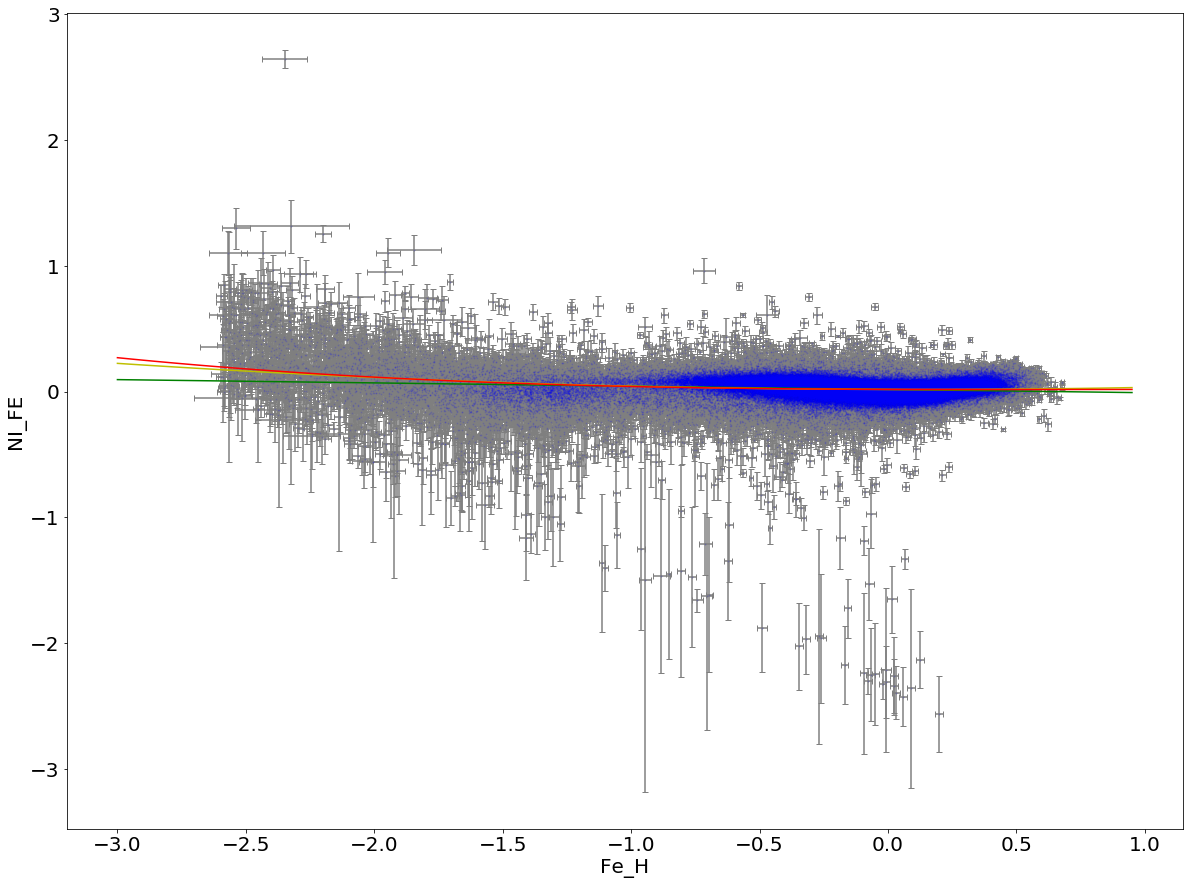

In [11]:
#g) no GLAT, Fe_H, NI_FE

gd8 = (star['Fe_H'] > -9999) &\
     (star['NI_FE'] > -9999) &\
     (star['Fe_H_ERR'] > -9999) &\
     (star['NI_FE_ERR'] > -9999)
good8 = np.where(gd)[0]



#values calculated from the new defined fuction, includes error
popt32, pcov32 = mcLinearFit(star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], [-0.02, 0.02])

print('mean slope: {:6.4f} +/- {:6.4f} , mean intercept: {:6.4f}  +/- {:6.4f}'.format(popt32[0], pcov32[0], \
                                                                                      popt32[1], pcov32[1]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
popt33, pcov33 = mcFit3param(poly2, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
                             [.02, 0, 0.02])

print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt33[0], pcov33[0], popt33[1], \
                                                                                      pcov33[1], popt33[2], pcov33[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction, includes error
#popt34, pcov34 = mcFit3param(lorentzian_cauchy, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], \
#                             star['NI_FE_ERR'][gd8], [-0.1, 0, 0])

#print('a: {:6.4f} +/- {:6.4f} , b: {:6.4f}  +/- {:6.4f}, c: {:6.4f}  +/- {:6.4f}'.format(popt34[0], pcov34[0], popt34[1], \
#                                                                                      pcov34[1], popt34[2], pcov34[2]))
        #6.4f is 6 numbers with 4 decimals
#------------------------------------------------------------------------

#values calculated from the new defined fuction
popt35, pcov35 = mc4Fit(poly3, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
                   [0, .01, 0, .02])

print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
      .format(popt35[0], pcov35[0], popt35[1], pcov35[1], popt35[2], pcov35[2], popt35[3], pcov35[3]))
        #6.4f is 6 numbers with 4 decimals    

#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt36, pcov36 = mc4Fit(exponential, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt36[0], pcov36[0], popt36[1], pcov36[1], popt36[2], pcov36[2], popt36[3], pcov36[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt37, pcov37 = mc4Fit(cosfit, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt37[0], pcov37[0], popt37[1], pcov37[1], popt37[2], pcov37[2], popt37[3], pcov37[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt38, pcov38 = mc4Fit(logfit, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt38[0], pcov38[0], popt38[1], pcov38[1], popt38[2], pcov38[2], popt38[3], pcov38[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------

#values calculated from the new defined fuction
#popt39, pcov39 = mc4Fit(sigmoid, star['Fe_H'][gd8], star['NI_FE'][gd8], star['Fe_H_ERR'][gd8], star['NI_FE_ERR'][gd8], \
#                   [1, 1, 1, 1])

#print('a: {:6.4f} +/- {:6.4f}  , b: {:6.4f}  +/- {:6.4f} , \
#      c: {:6.4f} +/- {:6.4f} , d: {:6.4f}  +/- {:6.4f}' \
#      .format(popt39[0], pcov39[0], popt39[1], pcov39[1], popt39[2], pcov39[2], popt39[3], pcov39[3]))
        #6.4f is 6 numbers with 4 decimals 
#---------------------------------------------------------------------------------


fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['Fe_H'][gd8],star['NI_FE'][gd8],s=1,c='b',alpha=0.1)
ax4.errorbar(star['Fe_H'][gd8], star['NI_FE'][gd8],yerr = star['NI_FE_ERR'][gd8], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)
ax4.errorbar(star['Fe_H'][gd8], star['NI_FE'][gd8],xerr=star['Fe_H_ERR'][gd8], \
            c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)

xplot8 = np.arange(-3, 1, 0.05)
ax4.plot(xplot8, linear(xplot8, popt32[0], popt32[1]), c='g')
#ax4.plot(xplot8, gausian(xplot8, popt33[0], popt33[1]), c='y')

ax4.plot(xplot8, poly2(xplot8, popt33[0], popt33[1], popt33[2]), c='y')
#ax4.plot(xplot8, lorentzian_cauchy(xplot8, popt34[0], popt34[1], popt33[2]), c='y')

ax4.plot(xplot8, poly3(xplot8, popt35[0], popt35[1], popt35[2], popt35[3]), c='r')
#ax4.plot(xplot8, exponential(xplot8, popt36[0], popt36[1], popt36[2], popt36[3]), c='y')
#ax4.plot(xplot8, cosfit(xplot8, popt37[0], popt37[1], popt37[2], popt37[3]), c='g')
#ax4.plot(xplot8, logfit(xplot8, popt38[0], popt38[1], popt38[2], popt38[3]), c='y')
#ax4.plot(xplot8, sigmoid(xplot8, popt39[0], popt39[1], popt39[2], popt39[3]), c='y')

ax4.set_xlabel("Fe_H",size=20)
ax4.set_ylabel("NI_FE",size=20)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

a) see above
b) The three functions which best fit the data, that I was able to be successful with, are the linear, poly2, and poly 3 graphs. (sigmoid was successful, but with an overall larger pcov than poly3)
c) Based on the graph without errors, there is no second populations. The errors for the outliers are enormous.